In [1]:
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from scipy.fft import fftfreq
import datetime

In [2]:
data = np.loadtxt('./NM_data.csv',delimiter=',',skiprows=1,usecols=(1,3))

In [3]:
data_n=data

In [5]:
fractional_time = data [:,0]

In [6]:
print(fractional_time)

[1969.        1969.0000095 1969.000019  ... 2024.8770207 2024.8770302
 2024.8770397]


In [11]:
CCR = data [:,1]

In [13]:
CCR[ CCR==0 ] = np.nan
#removes zero results

In [15]:
CCR[ CCR>=8200 ] = np.nan
#removes the 70000 result

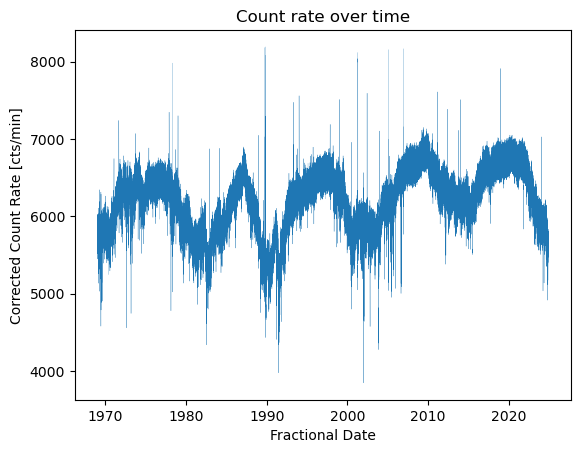

In [17]:
plt.plot(fractional_time,CCR,linewidth=0.2)
plt.xlabel('Fractional Date')
plt.ylabel('Corrected Count Rate [cts/min]')
plt.title('Count rate over time')
plt.savefig('Count rate graph all time 5 minute intervals (cleaned up)')

In [10]:
np.amax(CCR)

nan

In [19]:
data_1 = pd.read_csv('./NM_data.csv',delimiter=',',index_col=0)

In [20]:
data_1

,FractionalDate,UncorrectedCountRate[cts/min],CorrectedCountRate[cts/min],Pressure[mbar]
Timestamp,,,,
1969-01-01T00:00:00Z,1969.000000,5271,5782,1012.50
1969-01-01T00:05:00Z,1969.000010,5205,5711,1012.53
1969-01-01T00:10:00Z,1969.000019,5232,5742,1012.57
1969-01-01T00:15:00Z,1969.000029,5205,5714,1012.60
1969-01-01T00:20:00Z,1969.000038,5181,5689,1012.63
...,...,...,...,...
2024-11-16T23:35:00Z,2024.877002,6981,5656,971.28
2024-11-16T23:40:00Z,2024.877011,7182,5818,971.30
2024-11-16T23:45:00Z,2024.877021,7013,5683,971.32


In [23]:
data_1.index=pd.to_datetime(data_1.index)

In [24]:
print(data_1.index.dtype, data_1)

datetime64[ns, UTC]                            FractionalDate  UncorrectedCountRate[cts/min]  \
Timestamp                                                                  
1969-01-01 00:00:00+00:00     1969.000000                           5271   
1969-01-01 00:05:00+00:00     1969.000010                           5205   
1969-01-01 00:10:00+00:00     1969.000019                           5232   
1969-01-01 00:15:00+00:00     1969.000029                           5205   
1969-01-01 00:20:00+00:00     1969.000038                           5181   
...                                   ...                            ...   
2024-11-16 23:35:00+00:00     2024.877002                           6981   
2024-11-16 23:40:00+00:00     2024.877011                           7182   
2024-11-16 23:45:00+00:00     2024.877021                           7013   
2024-11-16 23:50:00+00:00     2024.877030                           6998   
2024-11-16 23:55:00+00:00     2024.877040                           

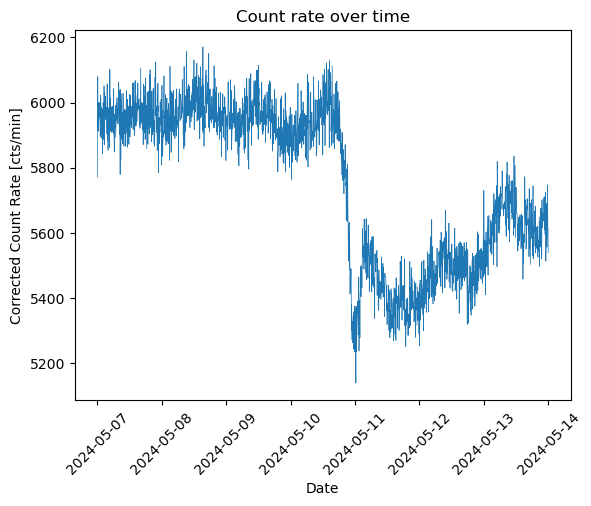

In [41]:
sp = '2024-05-07 00:00:00'
ep = '2024-05-14 00:00:00'
df_plot = data_1.loc[sp:ep]
#replacing zero results with numpy not a number (nan) to clean data and get readable graphs
plt.plot(df_plot.index, df_plot['CorrectedCountRate[cts/min]'].replace(0, np.nan),linewidth=0.5)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Corrected Count Rate [cts/min]')
plt.title('Count rate over time')
plt.savefig('Count rate graph 2024-05-07 to 2024-05-14 5 minute intervals', bbox_inches="tight")

In [21]:
y=data_1['CorrectedCountRate[cts/min]'].replace(0, np.nan)

In [22]:
sp1 = '1998-01-01 00:00:00'
ep1 = '1999-01-01 00:00:00'
sp2 = '1999-01-01 00:00:00'
ep2 = '2000-01-01 00:00:00'
sp3 = '2003-01-01 00:00:00'
ep3 = '2004-01-01 00:00:00'
sp4 = '2004-01-01 00:00:00'
ep4 = '2005-01-01 00:00:00'
sp5 = '2000-01-01 00:00:00'
ep5 = '2001-01-01 00:00:00'
sp6 = '2006-01-01 00:00:00'
ep6 = '2007-01-01 00:00:00'

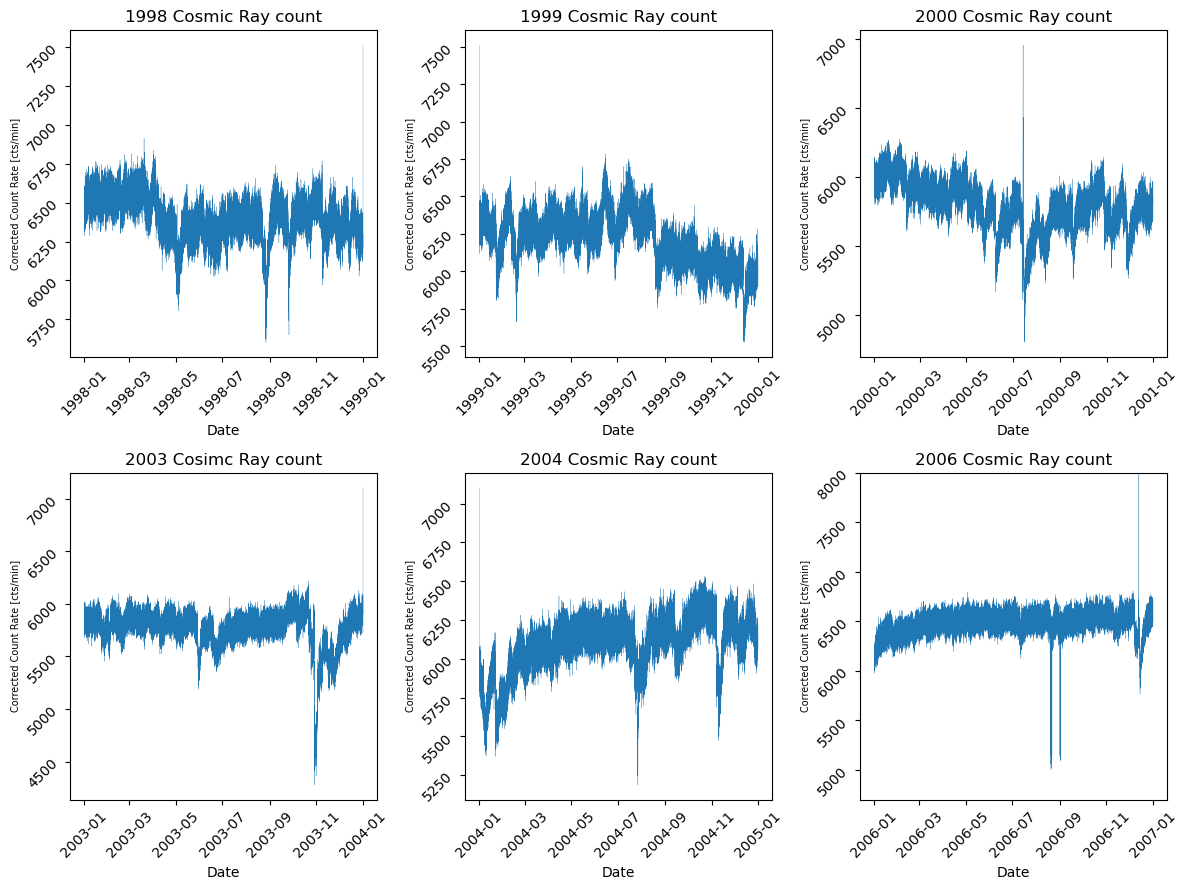

In [23]:
#setting the bounds of the data
df_plot1 = data_1.loc[sp1:ep1]
df_plot2 = data_1.loc[sp2:ep2]
df_plot3 = data_1.loc[sp3:ep3]
df_plot4 = data_1.loc[sp4:ep4]
df_plot5 = data_1.loc[sp5:ep5]
df_plot6 = data_1.loc[sp6:ep6]

# Get the dates from pandas array
X = df_plot.index

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 3, figsize=(12, 9))

# For top left Function
axis[0, 0].plot(df_plot1.index, df_plot1['CorrectedCountRate[cts/min]'].replace(0, np.nan),linewidth=0.2)
axis[0, 0].set_title("1998 Cosmic Ray count")
axis[0, 0].set_xlabel('Date')
axis[0, 0].tick_params(labelrotation=45)
axis[0, 0].set_ylabel('Corrected Count Rate [cts/min]',fontsize = 7)


# For middle top Function
axis[0, 1].plot(df_plot2.index, df_plot2['CorrectedCountRate[cts/min]'].replace(0, np.nan),linewidth=0.2)
axis[0, 1].set_title("1999 Cosmic Ray count")
axis[0, 1].set_xlabel('Date')
axis[0, 1].tick_params(labelrotation=45)
axis[0, 1].set_ylabel('Corrected Count Rate [cts/min]',fontsize = 7)

# For bottom left Function
axis[1, 0].plot(df_plot3.index, df_plot3['CorrectedCountRate[cts/min]'].replace(0, np.nan),linewidth=0.2)
axis[1, 0].set_title("2003 Cosimc Ray count")
axis[1, 0].set_xlabel('Date')
axis[1, 0].tick_params(labelrotation=45)
axis[1, 0].set_ylabel('Corrected Count Rate [cts/min]',fontsize = 7)

# For middle bottom Function
axis[1, 1].plot(df_plot4.index, df_plot4['CorrectedCountRate[cts/min]'].replace(0, np.nan),linewidth=0.2)
axis[1, 1].set_title("2004 Cosmic Ray count")
axis[1, 1].set_xlabel('Date')
axis[1, 1].tick_params(labelrotation=45)
axis[1, 1].set_ylabel('Corrected Count Rate [cts/min]',fontsize = 7)

# For top right Function
axis[0, 2].plot(df_plot5.index, df_plot5['CorrectedCountRate[cts/min]'].replace(0, np.nan),linewidth=0.2)
axis[0, 2].set_title("2000 Cosmic Ray count")
axis[0, 2].set_xlabel('Date')
axis[0, 2].tick_params(labelrotation=45)
axis[0, 2].set_ylabel('Corrected Count Rate [cts/min]',fontsize = 7)

# For bottom right Function
axis[1, 2].plot(df_plot6.index, (df_plot6['CorrectedCountRate[cts/min]'].replace(0, np.nan)),linewidth=0.2)
axis[1, 2].set_title("2006 Cosmic Ray count")
axis[1, 2].set_xlabel('Date')
axis[1, 2].tick_params(labelrotation=45)
axis[1, 2].set_ylabel('Corrected Count Rate [cts/min]',fontsize = 7)

# Combine all the operations and display
plt.ylim(4700, 8000)
plt.tight_layout()
plt.savefig('Count rate graphs during solar events')
plt.show()

In [24]:
comp_plot1=data_1.loc['2001-01-01 00:00:00':'2002-01-01 00:00:00']
comp_plot2=data_1.loc['2002-01-01 00:00:00':'2003-01-01 00:00:00']
comp_plot3=data_1.loc['2003-01-01 00:00:00':'2004-01-01 00:00:00']

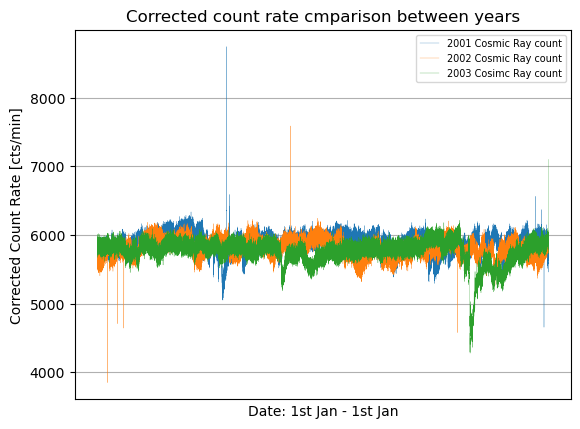

In [25]:
plt.plot(df_plot.index, comp_plot1['CorrectedCountRate[cts/min]'].replace(0, np.nan),linewidth=0.2, label='2001 Cosmic Ray count')
plt.plot(df_plot.index, comp_plot2['CorrectedCountRate[cts/min]'].replace(0, np.nan),linewidth=0.2, label='2002 Cosmic Ray count')
plt.plot(df_plot.index, comp_plot3['CorrectedCountRate[cts/min]'].replace(0, np.nan),linewidth=0.2, label='2003 Cosimc Ray count')
plt.xticks([])
plt.xlabel('Date: 1st Jan - 1st Jan')
plt.ylabel('Corrected Count Rate [cts/min]')
plt.title('Corrected count rate cmparison between years')
plt.grid(True)
plt.figsize=(12, 9)
plt.legend(fontsize = 7)

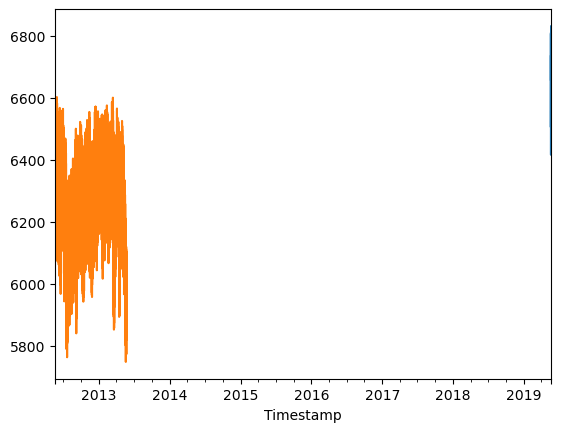

In [26]:
(data_1['CorrectedCountRate[cts/min]'])["2019-05-20":"2019-05-21"].plot(),
(data_1['CorrectedCountRate[cts/min]'])["2012-05-20":"2013-05-21"].plot();

In [27]:
data_1_timeframe=data_1.loc['1970-01-01 00:00:00':'2023-01-01 00:00:00']

In [28]:
print(data_1_timeframe['CorrectedCountRate[cts/min]'])

Timestamp
1970-01-01 00:00:00+00:00    5848
1970-01-01 00:05:00+00:00    5799
1970-01-01 00:10:00+00:00    5863
1970-01-01 00:15:00+00:00    5848
1970-01-01 00:20:00+00:00    5848
                             ... 
2022-12-31 23:40:00+00:00    6254
2022-12-31 23:45:00+00:00    6221
2022-12-31 23:50:00+00:00    6182
2022-12-31 23:55:00+00:00    6201
2023-01-01 00:00:00+00:00    6241
Name: CorrectedCountRate[cts/min], Length: 5540607, dtype: int64


In [29]:
t = data_1_timeframe['FractionalDate']
s = data_1_timeframe['CorrectedCountRate[cts/min]']

In [30]:
fft = np.fft.fft(s)
fft_Amp = np.abs(fft)**2
fft[0] = 0
fftfreq = np.fft.fftfreq(len(s), d=300)

In [31]:
print(fft)

[ 0.00000000e+00+0.00000000e+00j  3.54403067e+08+8.28438852e+08j
  1.97870122e+08+1.63632045e+08j ... -1.06046240e+08+1.16849855e+08j
  1.97870122e+08-1.63632045e+08j  3.54403067e+08-8.28438852e+08j]


C:\Users\James\AppData\Local\Temp\ipykernel_18288\1629720894.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(fftfreq),np.log10(fft_Amp),linewidth=0.5)
C:\Users\James\AppData\Local\Temp\ipykernel_18288\1629720894.py:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(fftfreq),np.log10(fft_Amp),linewidth=0.5)


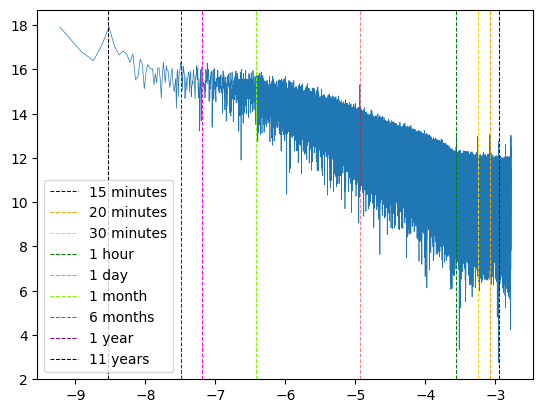

In [133]:
plt.plot(np.log10(fftfreq),np.log10(fft_Amp),linewidth=0.5)
plt.axvline(x = np.log10(1/900), color = 'navy', linestyle = '--', linewidth = 0.75, label= '15 minutes')
plt.axvline(x = np.log10(1/1200), color = 'orange', linestyle = '--', linewidth = 0.75, label= '20 minutes')
plt.axvline(x = np.log10(1/1800), color = 'gold', linestyle = '--', linewidth = 0.75, label= '30 minutes')
plt.axvline(x = np.log10(1/3600), color = 'green', linestyle = '--', linewidth = 0.75, label= '1 hour')
plt.axvline(x = np.log10(1/86400), color = 'red', linestyle = '--', linewidth = 0.75, alpha= 0.5, label= '1 day')
plt.axvline(x = np.log10(1/2628000), color = 'lawngreen', linestyle = '--', linewidth = 0.75, label= '1 month')
plt.axvline(x = np.log10(1/15768000), color = 'magenta', linestyle = '--', linewidth = 0.75, label= '6 months')
plt.axvline(x = np.log10(1/31536000), color = 'purple', linestyle = '--', linewidth = 0.75, label= '1 year')
plt.axvline(x = np.log10(1/346896000), color = 'black', linestyle = '--', linewidth = 0.75, label= '11 years')
plt.legend(loc = 'lower left')
plt.savefig('fft of corrected count rate data')